painting


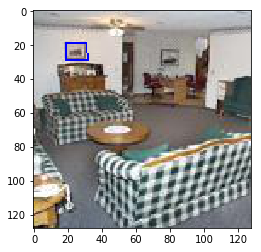

picture


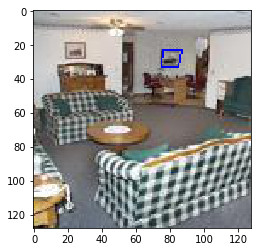

cushion


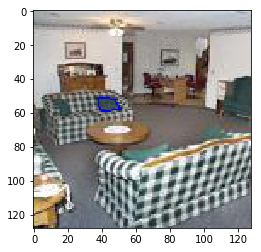

cushion


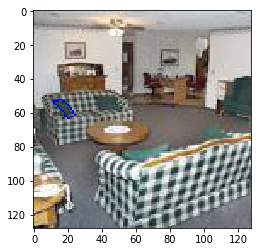

cushion


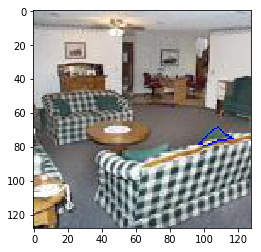

armchair


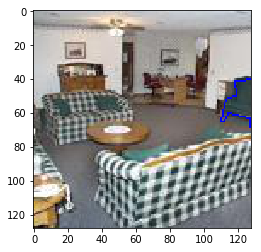

sofa


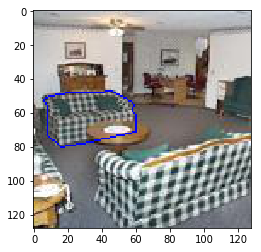

chair


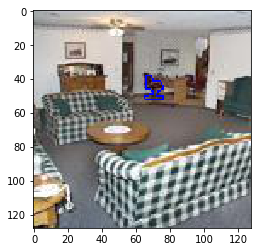

desk


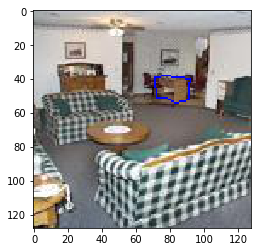

sofa


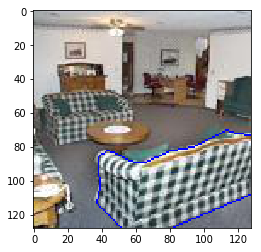

cushion


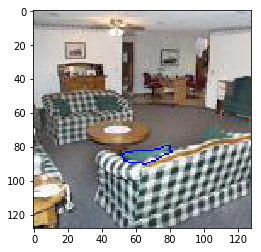

ceiling


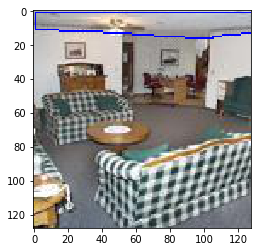

painting


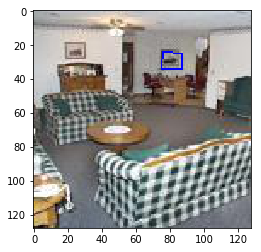

ceiling_fan


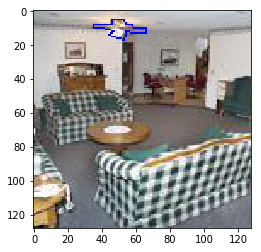

door_frame


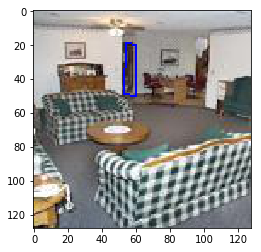

chair


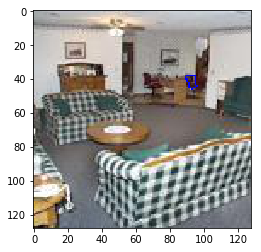

chair


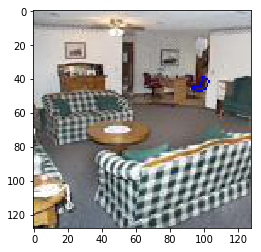

outlet


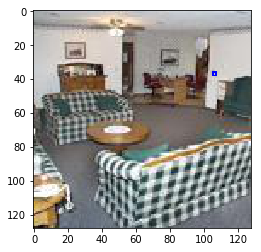

outlet


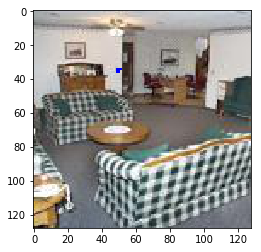

cabinet


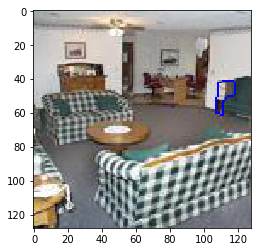

window


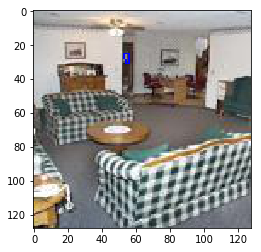

desk_lamp


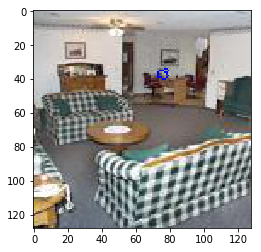

cabinets


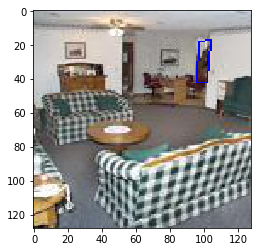

rug


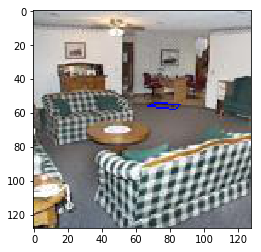

wall


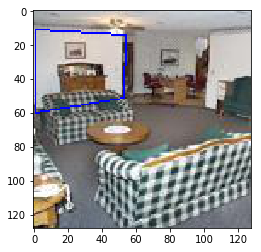

wall


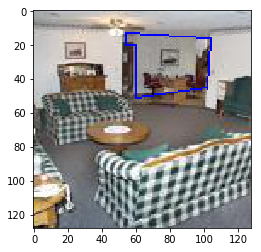

wall


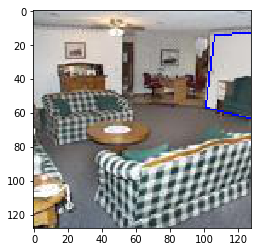

floor


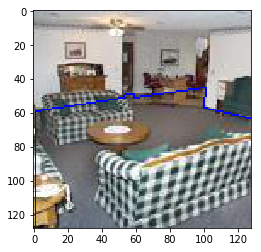

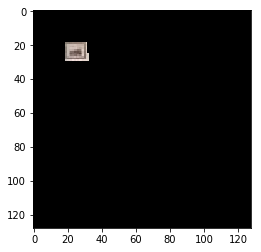

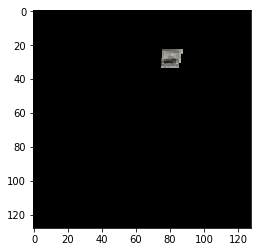

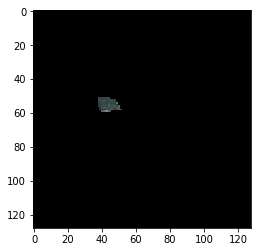

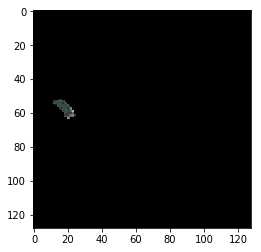

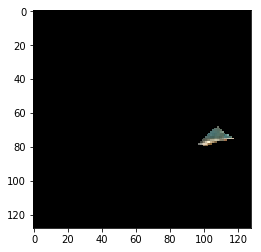

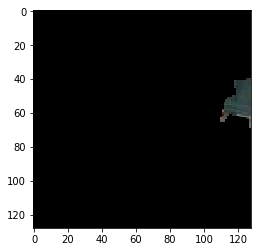

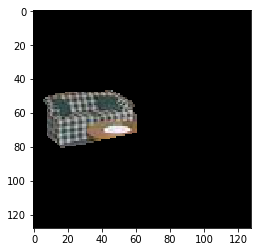

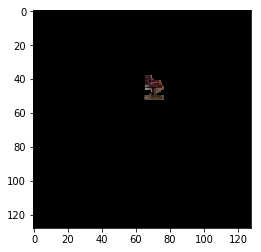

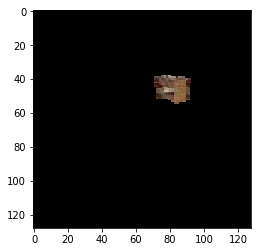

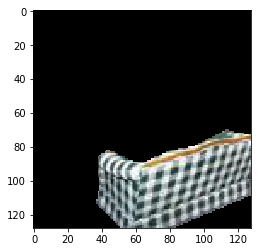

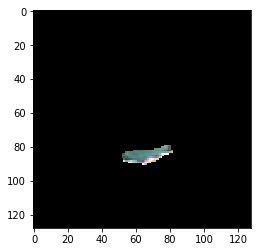

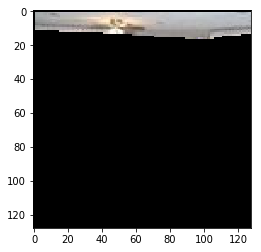

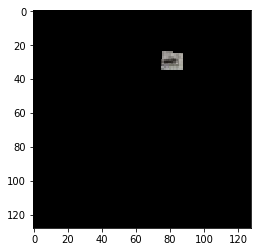

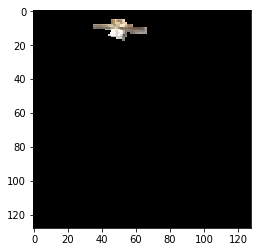

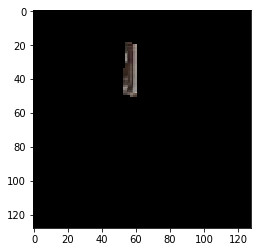

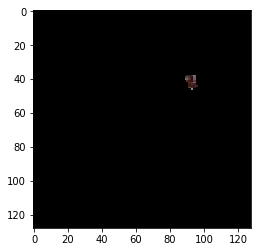

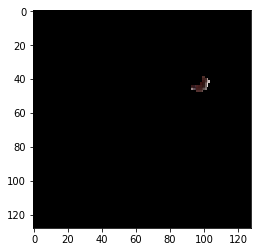

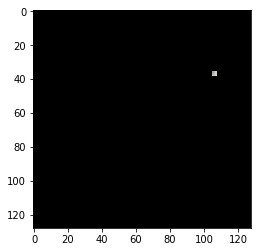

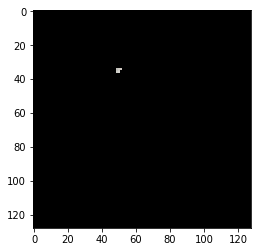

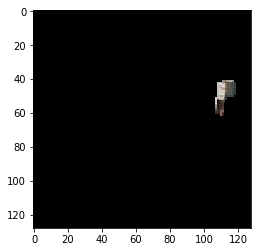

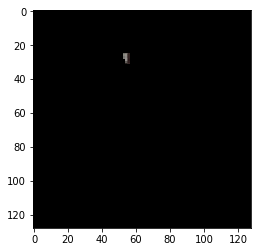

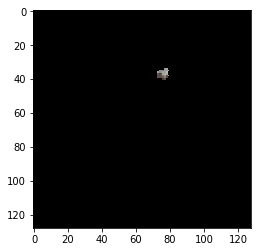

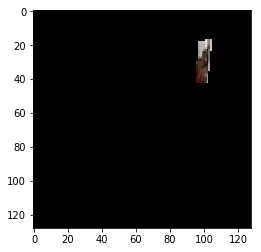

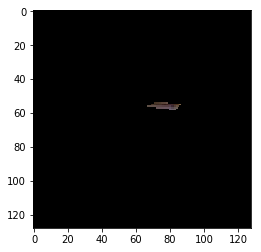

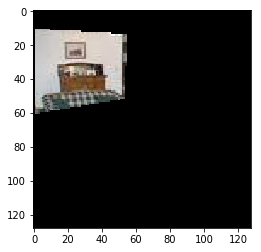

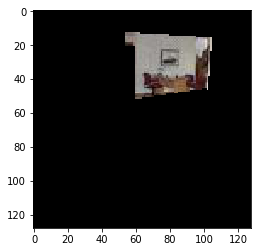

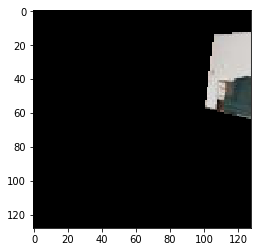

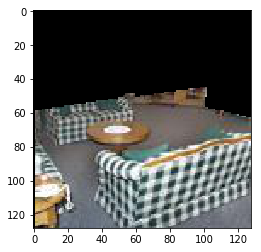

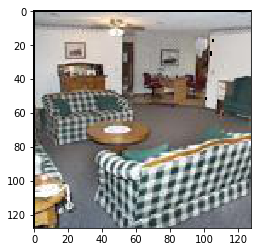

In [2]:
import cv2
from matplotlib import pyplot as plt
from collections import defaultdict
import numpy as np
import xml.etree.ElementTree as etree
import os

data_dir = '../externals/miniplaces_challenge/data/'

obj_to_id = {}
id_to_obj = {}
cls_to_id = {}
id_to_cls = {}
with open(os.path.join(data_dir, 'categories.txt')) as f:
    for line in f:
        line = line.split()
        id = int(line[1])
        cls = (line[0])
        cls_to_id[cls] = id
        id_to_cls[id] = cls

with open(os.path.join(data_dir, 'object_categories.txt')) as f:
    for line in f:
        line = line.split()
        id = int(line[1])
        obj = (line[0])
        obj_to_id[obj] = id
        id_to_obj[id] = obj
        
def get_objects(dataset, category, img_name):
    objects = []
    with open(os.path.join(data_dir, 'objects/{}{}/{}.xml'.format(dataset, category, img_name))) as f:
        xmltxt = '<root>' + f.read() +"</root>"
    root = etree.fromstring(xmltxt)
    
    for obj in root.findall('objects'):
        poly = []
        obj_cls = int(obj.find('class').text)
        for point in obj.find('polygon').findall('pt'):
            x = int(point.find('x').text)
            y = int(point.find('y').text)
            poly.append([x,y])
        bbox_el = obj.find('bndbox')
        bbox = [[int(bbox_el.find('xmin').text), int(bbox_el.find('ymin').text)], [int(bbox_el.find('xmax').text), int(bbox_el.find('ymax').text)]]
        objects.append((obj_cls, poly, bbox))
    return objects
    
def draw_all_objs(im, objects):
    for poly in objects:
    
        pts = np.array(poly[1], np.int32)
        print id_to_obj[poly[0]]
        out_im = im.copy()
        cv2.polylines(out_im, [pts], True, (0, 0, 255))
        plt.imshow(out_im)
        plt.show()
    
dataset = 'train'
categories = sorted(id_to_cls.keys())
annotated_imgs = defaultdict(list)
for category_id in categories:
    category = id_to_cls[category_id]
    file_list = os.listdir(os.path.join(data_dir, 'objects/{}{}/'.format(dataset, category)))
    for f in file_list:
        img_name = f[:f.find('.')]
        annotated_imgs[category_id].append(img_name);
        
curr_class = '/l/living_room'

for filename in annotated_imgs[cls_to_id[curr_class]]:
    im = cv2.cvtColor(cv2.imread(os.path.join(data_dir, 'images/{}{}/{}.jpg'.format(dataset, curr_class, filename))), cv2.COLOR_BGR2RGB)
    objs = get_objects(dataset, curr_class, filename)
    draw_all_objs(im, objs)
    i  = 0
    totalmask = np.zeros((im.shape[0], im.shape[1]), dtype=np.uint8)
    for obj in objs:
        mask = np.zeros((im.shape[0], im.shape[1]), dtype=np.uint8)
        poly = np.array([obj[1]])
        ch = poly #cv2.convexHull(poly)
        ch = ch.squeeze()
        cv2.fillPoly(mask, [ch], 1)
        cv2.fillPoly(totalmask, [ch], 1)
        masked = cv2.bitwise_and(im, im, mask = mask)
        i+=1
        plt.imshow(masked)
        plt.show()
    #draw_all_objs(im, objs)
    masked = cv2.bitwise_and(im, im, mask = totalmask)
    
    plt.imshow(masked)
    plt.show()
    
    break
    
    
objects = get_objects(dataset, category, img_name)

#im = cv2.cvtColor(cv2.imread('../miniplaces_data/images/{}{}/{}.jpg'.format(dataset, category, img_name)), cv2.COLOR_BGR2RGB)
#draw_all_objs(im, objects)


        

#plt.imshow(im)
#plt.show()
